## Import Library

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

pd.set_option('display.max_colwidth', 1000)

## Data Preparation

In [2]:
# import data
df= pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# check shape of the dataset
df.shape

(307511, 122)

In [4]:
# check data type
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [5]:
# cek jumlah missing values di setiap column 
missing_percentage= (df.isnull().sum()/df.shape[0])*100
missing_percentage

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [6]:
# drop column % missing_values > 50% 
def drop_columns(df):
    missing_percentage= (df.isnull().sum()/df.shape[0])*100
    col_drop = missing_percentage[missing_percentage > 50].index
    df= df.drop(columns= col_drop)
    return df 

df= drop_columns(df)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [8]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [9]:
# replace 'unknown' values in 'NAME_FAMILY_STATUS' columns with 'married'
# replace 'XNA' values in 'CODE_GENDER' columns with 'female'
df['CODE_GENDER']= df['CODE_GENDER'].replace('XNA', 'F')
df['NAME_FAMILY_STATUS']= df['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')

In [10]:
# calc of the day (make abs)
df['DAYS_BIRTH']= df['DAYS_BIRTH'].abs()
df['DAYS_EMPLOYED']= df['DAYS_EMPLOYED'].abs()
df['DAYS_REGISTRATION']= df['DAYS_REGISTRATION'].abs()
df['DAYS_ID_PUBLISH']= df['DAYS_ID_PUBLISH'].abs()
df['DAYS_LAST_PHONE_CHANGE']= df['DAYS_LAST_PHONE_CHANGE'].abs()

# create new column to calc client age
df['AGE']= (df['DAYS_BIRTH']/365).astype(int)

age_category= []
for i in df['AGE']:
    if i <=35:
        age_category.append('Early Adult')
    elif i <=45:
        age_category.append('Adult')
    else:
        age_category.append('Older')

In [11]:
# count the number of clients
len(df['SK_ID_CURR'].value_counts())

307511

In [12]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54


## EDA

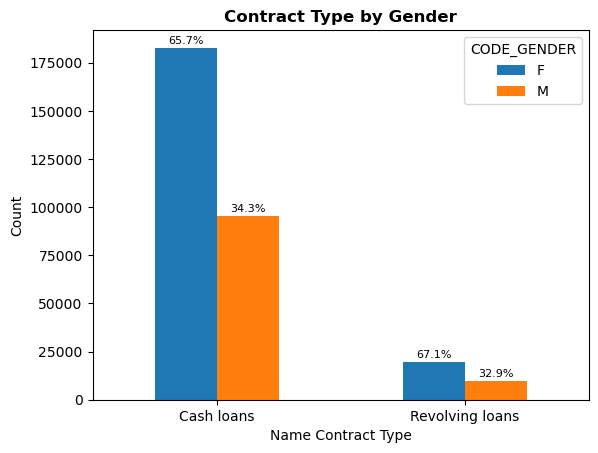

In [13]:
# barchart name_contract_type & code_gender 
contract_gender= df.groupby(['NAME_CONTRACT_TYPE', 'CODE_GENDER']).size().unstack()
axis= contract_gender.plot(kind='bar') #unstack the category

axis.set_xticklabels(axis.get_xticklabels(), rotation=0)

# add percentage 
for i, p in enumerate(axis.patches):
    total= contract_gender.sum(axis=1)
    axis.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                  textcoords='offset points')
    
plt.xlabel('Name Contract Type')
plt.ylabel('Count')
plt.title('Contract Type by Gender', weight= 'bold')
plt.show()


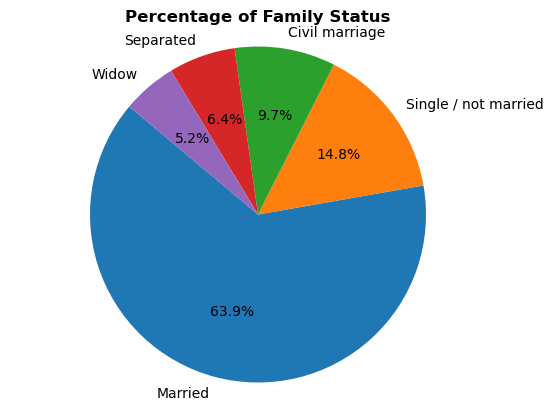

In [14]:
# pie chart name_family status
fam_stat= df['NAME_FAMILY_STATUS'].value_counts()

plt.pie(fam_stat, labels= fam_stat.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Family Status', weight= 'bold')
plt.axis('equal')
plt.show()

### Clients Payment Status (payment diffculties or no payment difficulties)

In [15]:
# create new column to replace values using text description
status= {0: 'No Payment Difficulties', 1:'Payment Difficulties'}
df['TARGET_DESC']= df['TARGET'].replace(status)

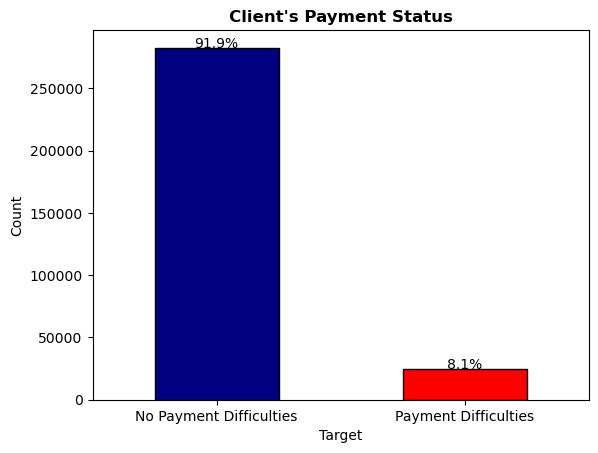

In [16]:
# barchart target 
axis= df['TARGET_DESC'].value_counts().plot(kind='bar', color=['navy','red'], edgecolor='black')

# percentages of each category 
percentages= df['TARGET_DESC'].value_counts(normalize=True)*100

for i, count in enumerate (df['TARGET_DESC'].value_counts()):
    axis.text(i, count+0.1, f'{percentages[i]:.1f}%', ha='center')
    
plt.xlabel('Target')
plt.ylabel('Count')
plt.title("Client's Payment Status", weight= 'bold')
plt.xticks(rotation=0)
plt.show()

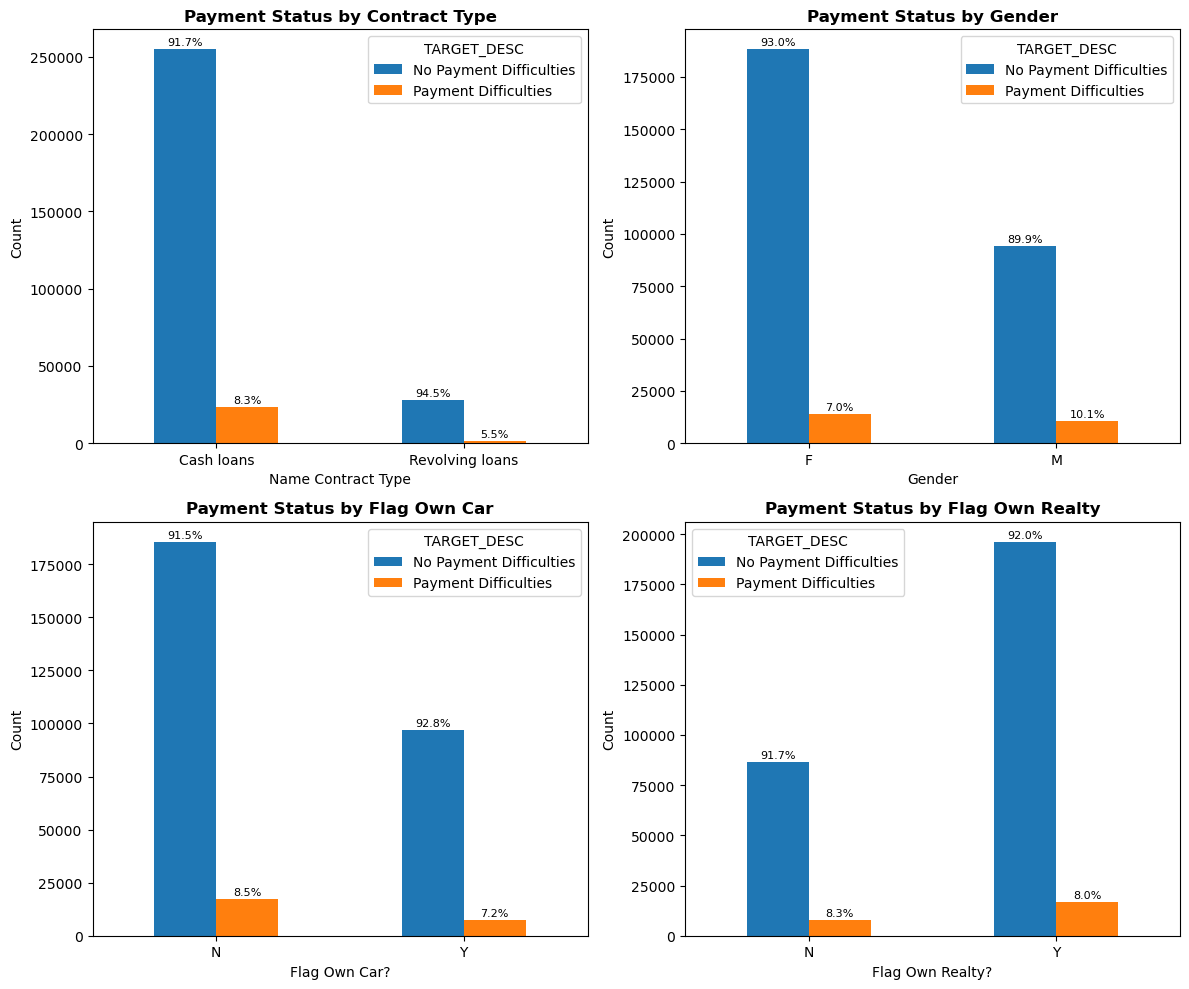

In [17]:
# compare TARGET with other categories (1)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Barchart target & contract_type
target_contract = df.groupby(['NAME_CONTRACT_TYPE', 'TARGET_DESC']).size().unstack()
axis1 = target_contract.plot(kind='bar', ax=axes[0, 0])  # Unstack the category
axis1.set_xticklabels(axis1.get_xticklabels(), rotation=0)
axis1.set_xlabel('Name Contract Type')
axis1.set_ylabel('Count')
axis1.set_title('Payment Status by Contract Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis1.patches):
    total = target_contract.sum(axis=1)
    axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
    
#========================================================================================
# Barchart target & code_gender
target_gender = df.groupby(['CODE_GENDER', 'TARGET_DESC']).size().unstack()
axis2 = target_gender.plot(kind='bar', ax=axes[0, 1])  # Unstack the category
axis2.set_xticklabels(axis2.get_xticklabels(), rotation=0)
axis2.set_xlabel('Gender')
axis2.set_ylabel('Count')
axis2.set_title('Payment Status by Gender', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis2.patches):
    total = target_gender.sum(axis=1)
    axis2.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
    
#========================================================================================
# Barchart target & flag_own_car
target_flag_car = df.groupby(['FLAG_OWN_CAR', 'TARGET_DESC']).size().unstack()
axis3 = target_flag_car.plot(kind='bar', ax=axes[1, 0])  # Unstack the category
axis3.set_xticklabels(axis3.get_xticklabels(), rotation=0)
axis3.set_xlabel('Flag Own Car?')
axis3.set_ylabel('Count')
axis3.set_title('Payment Status by Flag Own Car', weight='bold')

# add percentage labels
for i, p in enumerate(axis3.patches):
    total = target_flag_car.sum(axis=1)
    axis3.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

#========================================================================================
# Barchart target & flag_own_realty
target_flag_realty = df.groupby(['FLAG_OWN_REALTY', 'TARGET_DESC']).size().unstack()
axis4 = target_flag_realty.plot(kind='bar', ax=axes[1, 1])  # Unstack the category
axis4.set_xticklabels(axis4.get_xticklabels(), rotation=0)
axis4.set_xlabel('Flag Own Realty?')
axis4.set_ylabel('Count')
axis4.set_title('Payment Status by Flag Own Realty', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis4.patches):
    total = target_flag_realty.sum(axis=1)
    axis4.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
plt.tight_layout()
plt.show()

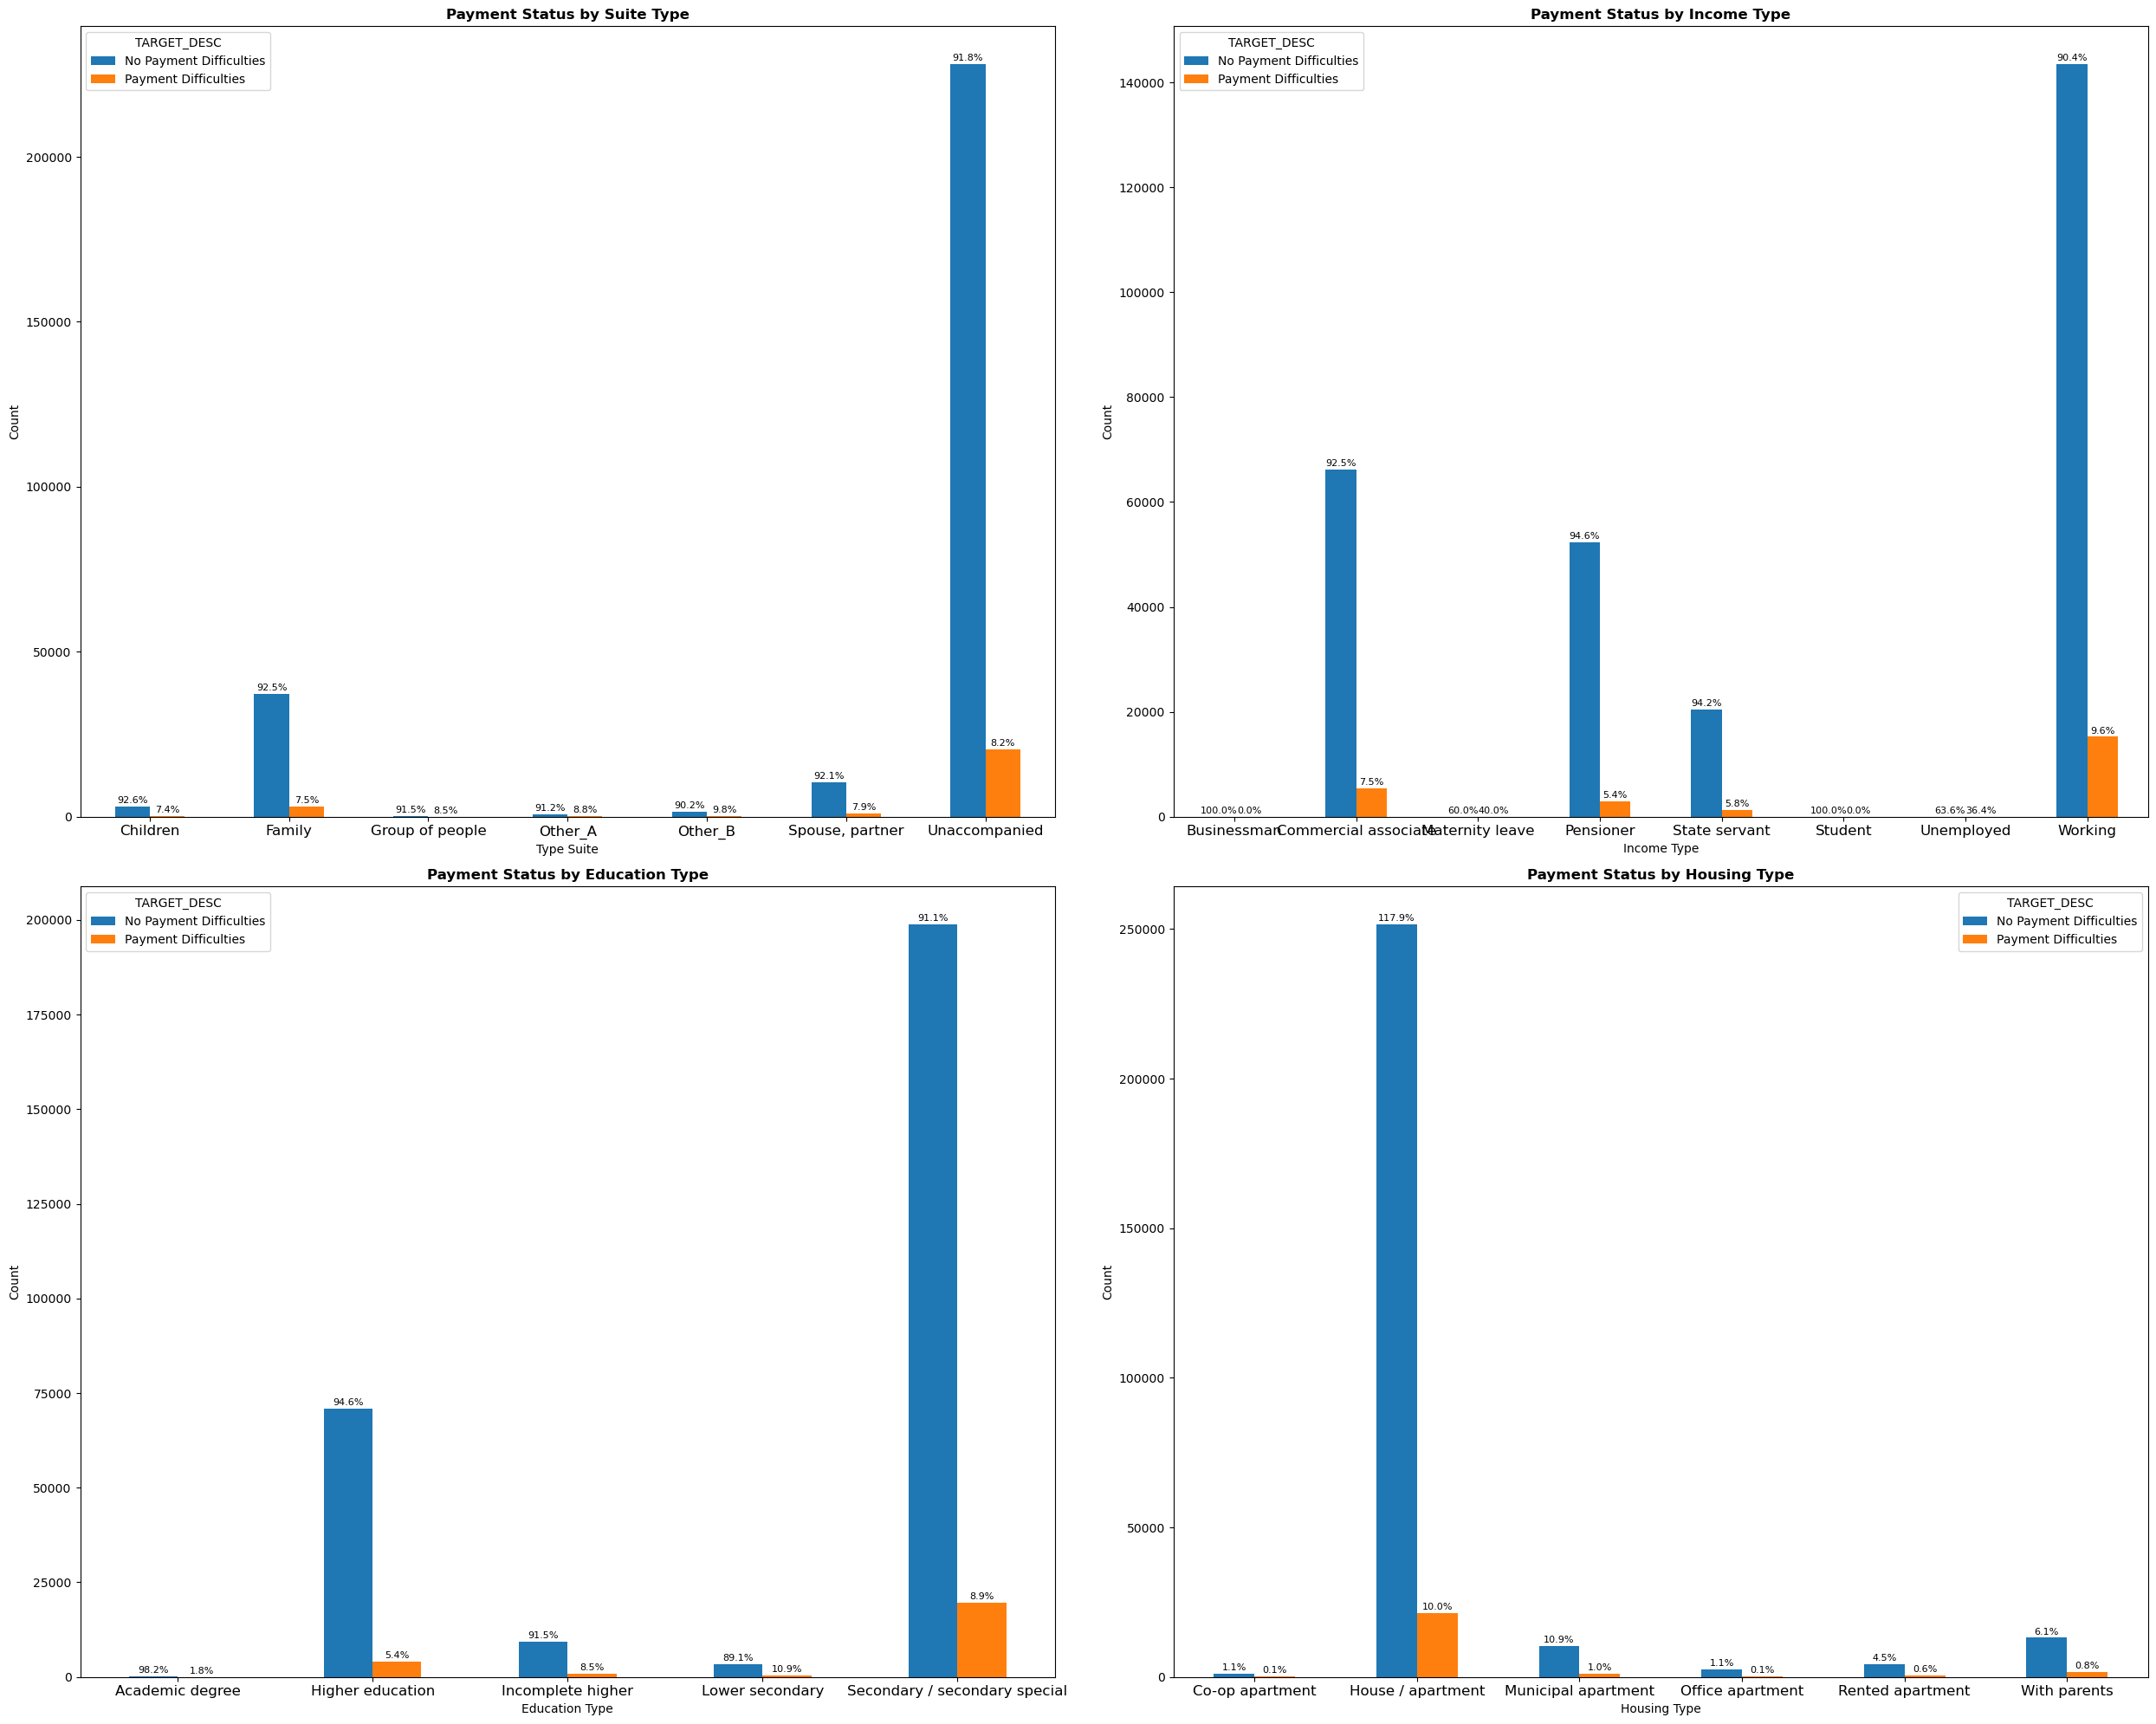

In [18]:
# compare TARGET with other categories (2)

fig, axes = plt.subplots(2, 2, figsize=(25, 20))

# Barchart target & name_type_suite
target_suite = df.groupby(['NAME_TYPE_SUITE', 'TARGET_DESC']).size().unstack()
axis1 = target_suite.plot(kind='bar', ax=axes[0, 0])  # Unstack the category
axis1.set_xticklabels(axis1.get_xticklabels(), rotation=0, fontsize=12)
axis1.set_xlabel('Type Suite')
axis1.set_ylabel('Count')
axis1.set_title('Payment Status by Suite Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis1.patches):
    total = target_suite.sum(axis=1)
    axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
    
#========================================================================================
# Barchart target & name_income_type
target_income = df.groupby(['NAME_INCOME_TYPE', 'TARGET_DESC']).size().unstack()
axis2 = target_income.plot(kind='bar', ax=axes[0, 1])  # Unstack the category
axis2.set_xticklabels(axis2.get_xticklabels(), rotation=0, fontsize= 12)
axis2.set_xlabel('Income Type')
axis2.set_ylabel('Count')
axis2.set_title('Payment Status by Income Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis2.patches):
    total = target_income.sum(axis=1)
    axis2.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
    
#========================================================================================
# Barchart target & name_education_type
target_education = df.groupby(['NAME_EDUCATION_TYPE', 'TARGET_DESC']).size().unstack()
axis3 = target_education.plot(kind='bar', ax=axes[1, 0])  # Unstack the category
axis3.set_xticklabels(axis3.get_xticklabels(), rotation=0, fontsize=12)
axis3.set_xlabel('Education Type')
axis3.set_ylabel('Count')
axis3.set_title('Payment Status by Education Type', weight='bold')

# add percentage labels
for i, p in enumerate(axis3.patches):
    total = target_education.sum(axis=1)
    axis3.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

#========================================================================================
# Barchart target & name_housing_type
target_house = df.groupby(['NAME_HOUSING_TYPE', 'TARGET_DESC']).size().unstack()
axis4 = target_house.plot(kind='bar', ax=axes[1, 1])  # Unstack the category
axis4.set_xticklabels(axis4.get_xticklabels(), rotation=0, fontsize=12)
axis4.set_xlabel('Housing Type')
axis4.set_ylabel('Count')
axis4.set_title('Payment Status by Housing Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis4.patches):
    total = target_flag_realty.sum(axis=1)
    axis4.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
plt.tight_layout()
plt.show()

## Business Insights

cash loans = pinjaman tunai , revolving loans= pinjaman bergulir/pinjamam berjangka

1. Persentase clients yang memiliki permasalahan dalam payment problem of loan ada sebanyak 8.1% dari total peminjam atau sekitar 25K (24.908)
2. Jenis contract yang ditawarkan kepada para client terbagi menjadi 2 jenis, yaitu cash loans dan revolving loans dimana pada kedua jenis didominasi oleh client wanita, yaitu sebesar 65,7% pada cash loans dan 67,1% pada revolving loans
3. Clients female dinilai lebih disiplin dalam melunasi pinjaman dari male dengan persentase masalah yang lebih kecil. Clients with payment problem for female is around 7 % sedangkan male 10%.  
4. Terdapat sekitar 9% clients yang mengalami kesulitan dalam membayar cash loans dan 6% orang yang kesulitan dalam revolving loans.
5. Mayoritas clients yang memiliki payment difficulties tidak memiliki rumah dan realty pribadi
6. Berdasarkan type suite kategori clients yang memiliki payment difficulties paling banyak berasal dari kategori 'Unaccompanied' yang diikuti oleh 'Family'
7. Berdasrkan jenis pendidikan tertinggi yang ditempuh oleh clients mayoritas ada pada 'Scondary/secondary special' yaitu sebesar 8,9% sedangkan berdasarkan employee type clients dengan payment difficulties mayoritas berasal dari kelompok 'working' yang diikuti oleh kelompok 'commercial assosiate' dan 'pensioner'
8. Clients dengan 'housing type' = House/Apartment memiliki persentase tertinggi dibandingkan kategori lain yaitu sebesar 10% atau sekitar (31K) clients

## Data Preprocessing

In [19]:
df.shape

print(df.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
AGE                             int32
TARGET_DESC                    object
Length: 83, dtype: object


In [20]:
# numerical column 
num_columns= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'CNT_CHILDREN','CNT_FAM_MEMBERS',
              'EXT_SOURCE_3','EXT_SOURCE_2','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
             'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']
df[num_columns]= df[num_columns].fillna(value= df[num_columns].median())

In [21]:
cat= df.select_dtypes(exclude= 'number').columns.tolist()
cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'TARGET_DESC']

In [22]:
df_copy= df.copy()

In [23]:
df_copy[cat]= df_copy[cat].apply(LabelEncoder().fit_transform)
df_copy.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,TARGET_DESC
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,0


In [24]:
df_copy= df_copy.dropna()

In [25]:
df_copy.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,TARGET_DESC
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,0
12,100016,0,0,0,0,1,0,67500.0,80865.0,5881.5,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,36,0
13,100017,0,0,1,1,0,1,225000.0,918468.0,28966.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,38,0
14,100018,0,0,0,0,1,0,189000.0,773680.5,32778.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,39,0


In [26]:
df_copy.drop(['SK_ID_CURR'], inplace= True,axis=1)
df_copy.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,TARGET_DESC
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,0
12,0,0,0,0,1,0,67500.0,80865.0,5881.5,67500.0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,36,0
13,0,0,1,1,0,1,225000.0,918468.0,28966.5,697500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,38,0
14,0,0,0,0,1,0,189000.0,773680.5,32778.0,679500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,39,0


In [27]:
X= df_copy.drop(['TARGET'], axis=1)
y= df_copy['TARGET']

## Feature Selection

In [28]:
# feature selection 
features_selected= SelectKBest(score_func= chi2, k=15)
fit= features_selected.fit(X,y)
df_scores= pd.DataFrame(fit.scores_)
df_pvalues= pd.DataFrame(fit.pvalues_)
df_columns= pd.DataFrame(X.columns)

feature_scores= pd.concat([df_columns, df_scores, df_pvalues], axis=1)
feature_scores.columns= ['Features', 'Score', 'P-Value']

print('The features that correlate well with target feature:\n')
feature_scores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score,P-Value
16,DAYS_EMPLOYED,7.190080e+07,0.000000
8,AMT_GOODS_PRICE,5.190123e+07,0.000000
6,AMT_CREDIT,3.190966e+07,0.000000
15,DAYS_BIRTH,8.874080e+05,0.000000
17,DAYS_REGISTRATION,4.024510e+05,0.000000
...,...,...,...
42,YEARS_BEGINEXPLUATATION_MODE,1.663119e-02,0.897388
40,YEARS_BEGINEXPLUATATION_AVG,1.530259e-02,0.901550
24,FLAG_EMAIL,7.130612e-03,0.932704
22,FLAG_CONT_MOBILE,1.559391e-03,0.968500


In [29]:
# filter features (that have p-values < 0.05)
feature_fix= feature_scores[feature_scores['P-Value'] < 0.05]
features= feature_fix['Features'].to_list()

number_features= len(features)
print(f'the number of important features = {number_features}')
features

the number of important features = 51


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',

## Oversampling Data Using SMOTE

In [30]:
# update X 
X= df_copy[features]

In [31]:
# check composition of target label 
X['TARGET_DESC'].value_counts()

# imbalanced data occurs, so I choose to oversampling the data 

0    142162
1     10663
Name: TARGET_DESC, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(y_res.value_counts())

1    142162
0    142162
Name: TARGET, dtype: int64


In [33]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [34]:
# check how many data testing
len(X_test)

56865

## ML Model 1 (Logistic Regression)

In [35]:
from sklearn.linear_model import LogisticRegression

# build model
logreg_model = LogisticRegression(max_iter=1000)

# train and test model
logreg_model.fit(X_train, y_train)
y_pred_lr = logreg_model.predict(X_test)

# show result
print(classification_report(y_test, y_pred_lr))

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.58      0.62      0.60     28358
           1       0.59      0.55      0.57     28507

    accuracy                           0.58     56865
   macro avg       0.58      0.58      0.58     56865
weighted avg       0.58      0.58      0.58     56865



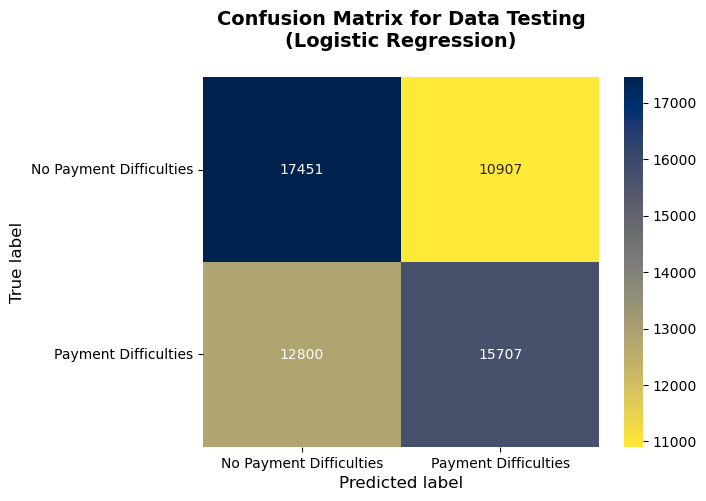

In [36]:
# create confusion matrix as a dataFrame
confusion_matrix_lr = pd.DataFrame((confusion_matrix(y_test, y_pred_lr)), ('No Payment Difficulties', 'Payment Difficulties'), 
                                    ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix LR 
plt.figure()
heatmap = sns.heatmap(confusion_matrix_lr, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix for Data Testing\n(Logistic Regression)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [37]:
roc_auc_lr = round(roc_auc_score(y_test, y_pred_lr),5)
print('ROC AUC:', roc_auc_lr)

ROC AUC: 0.58318


## ML Model 2 (Naive Bayes)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report


# build model NBC
nb_model = MultinomialNB()

# train and test model
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# show result
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.60      0.18      0.28     28358
           1       0.52      0.88      0.65     28507

    accuracy                           0.53     56865
   macro avg       0.56      0.53      0.47     56865
weighted avg       0.56      0.53      0.47     56865



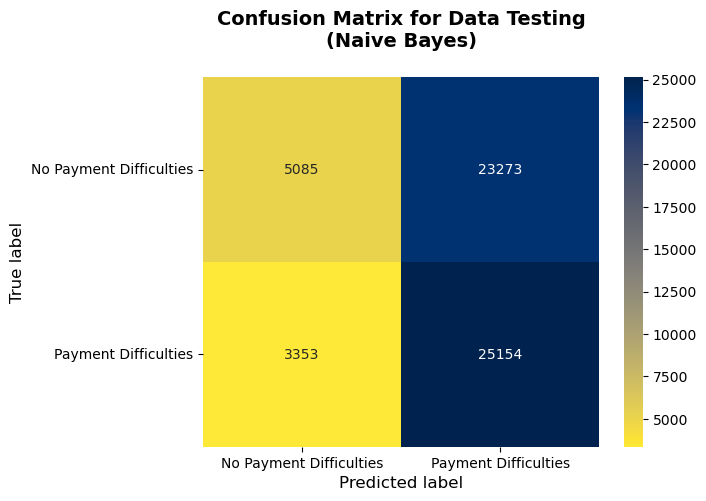

In [39]:
# create confusion matrix as a dataFrame
confusion_matrix_nb = pd.DataFrame((confusion_matrix(y_test, y_pred_nb)), ('No Payment Difficulties', 'Payment Difficulties'), 
                                    ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix nb
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nb, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix for Data Testing\n(Naive Bayes)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [40]:
roc_auc_nb = round(roc_auc_score(y_test, y_pred_nb),5)
print('ROC AUC:', roc_auc_nb)

ROC AUC: 0.53085


## ML Model 3 (K-Nearest Neighbors)

In [41]:
# build model 
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

# train and test data 
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# show result 
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     28358
           1       0.78      0.97      0.86     28507

    accuracy                           0.84     56865
   macro avg       0.87      0.84      0.84     56865
weighted avg       0.87      0.84      0.84     56865



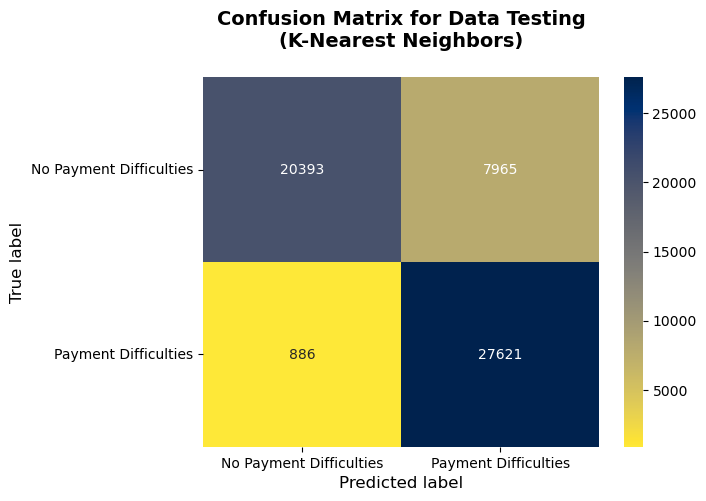

In [42]:
# create confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), 
                                    ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix KNN
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix for Data Testing\n(K-Nearest Neighbors)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [43]:
roc_auc_knn = round(roc_auc_score(y_test, y_pred_knn),5)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.84402


## ML Model 4 (Neural Network)

In [44]:
from sklearn.neural_network import MLPClassifier

# build model 
nn_model= MLPClassifier()

# train and test data 
nn_model.fit(X_train, y_train)
y_pred_nn= nn_model.predict(X_test)

# show result 
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77     28358
           1       1.00      0.41      0.58     28507

    accuracy                           0.70     56865
   macro avg       0.81      0.71      0.68     56865
weighted avg       0.81      0.70      0.68     56865



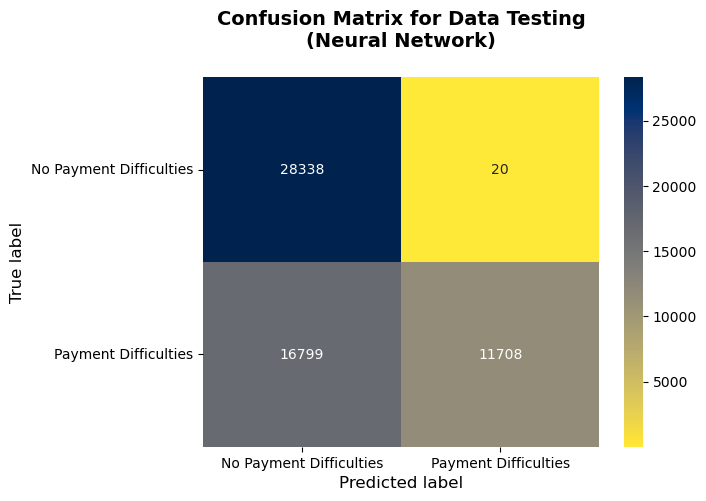

In [45]:
# create confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, y_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), 
                                    ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix NN
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix for Data Testing\n(Neural Network)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [46]:
roc_auc_nn = round(roc_auc_score(y_test, y_pred_nn),5)
print('ROC AUC:', roc_auc_nn)

ROC AUC: 0.705
